## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x_min = np.amin(x)
    x_max = np.amax(x)
    x_diff = x_max - x_min
    x = x.astype(np.float)
    x_diff_half = x_diff / 2.
    x = x - x_diff_half
    x = x / x_diff_half;
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 128, 128, 64, 64]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer" + str(i + 1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer" + str(i + 1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
print(model.summary())




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                8

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100




50000/50000 [==============================] - 3s 68us/step - loss: 1.7151 - acc: 0.3877 - val_loss: 1.5321 - val_acc: 0.4593
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4749 - acc: 0.4800 - val_loss: 1.4460 - val_acc: 0.4866
Epoch 3/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.3661 - acc: 0.5167 - val_loss: 1.4359 - val_acc: 0.4842
Epoch 4/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.2642 - acc: 0.5542 - val_loss: 1.3836 - val_acc: 0.5154
Epoch 5/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.1823 - acc: 0.5829 - val_loss: 1.3640 - val_acc: 0.5230
Epoch 6/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.1059 - acc: 0.6092 - val_loss: 1.3768 - val_acc: 0.5300
Epoch 7/100
50000/5000

50000/50000 [==============================] - 3s 52us/step - loss: 0.1128 - acc: 0.9625 - val_loss: 3.0783 - val_acc: 0.5329
Epoch 49/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.1167 - acc: 0.9607 - val_loss: 3.2500 - val_acc: 0.5261
Epoch 50/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.1126 - acc: 0.9630 - val_loss: 3.1437 - val_acc: 0.5337
Epoch 51/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.1098 - acc: 0.9633 - val_loss: 3.1941 - val_acc: 0.5284
Epoch 52/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.0994 - acc: 0.9670 - val_loss: 3.2573 - val_acc: 0.5244
Epoch 53/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.1173 - acc: 0.9616 - val_loss: 3.0668 - val_acc: 0.5266
Epoch 54/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.1150 - acc: 0.9621 - val_loss: 3.1594 - val_acc: 0.5231
Epoch 55/100
50000/50000 [==============

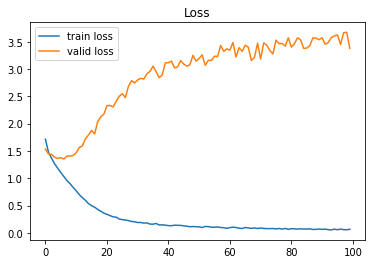

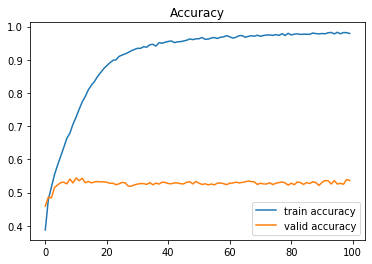

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()